# Curso de Análisis de Redes

## Universidad ORT Uruguay

------


## Repaso de conceptos de probabilidad e introducción a Julia

En este cuaderno trabajaremos en:

 * Algunos conceptos básicos de probabilidad y variables aleatorias.
 * Su análisis mediante Julia.
 
Para ello son necesarios algunos paquetes indicados en el archivo `Project.toml` asociado. La siguiente celda instala y actualiza los paquetes en caso de que no lo estén, usando como guía el `Project.toml`.

In [1]:
##Correr solo si los paquetes no están instalados.
# using Pkg; Pkg.instantiate(); Pkg.update()

## Variables aleatorias

> **Definición:** una *variable aleatoria* $X$ es una función $X:\Omega \mapsto \mathbb{R}$ donde $\Omega$ es el espacio muestral de un espacio de probabilidad $(\Omega,\mathcal{A},P)$.
>
>*Interpretación:* es el resultado *numérico* de un experimento.

> La variable aleatoria queda caracterizada por su *función de distiribución (acumulada)* (CDF):
>
> $$F_X(t) = P(X\leqslant t)$$

### Ejemplo

Consideremos el experimento de lanzar una bola en la ruleta. La ruleta tiene $37$ resultados posibles (del $0$ al $36$) y asumimos todos equiprobables. Sea la variable aleatoria:

$$ X = \text{"no. que sale en la ruleta"}.$$

Entonces $X$ es una variable *discreta* cuyo recorrido es $\{0,\ldots,36\}$ y su *ley de probabilidad* está dada por:

$$P(X=i) = \frac{1}{37} \quad \forall i=0,\ldots,36.$$

**Nota:** Si la variable es discreta, alcanza con especificar la ley, la CDF será una escalera que acumula estos valores. 

### Pasando a Julia.

Podemos analizar lo anterior en Julia usando el paquete `Distributions`, que permite:
 * Definir distribuciones de probabilidad (algunas ya incluidas).
 * Realizar sorteos siguiendo dichas distribuciones.

In [2]:
#incluimos las bibliotecas necesarias: Distributions y Plots para graficar.
using Distributions, Plots

#Parametros por defecto de las graficas
default(size=(900,500),legend=:bottomright)

In [3]:
#Creo una distribución uniforme en {0,...,36}
distX = DiscreteUniform(0,36)

DiscreteUniform(a=0, b=36)

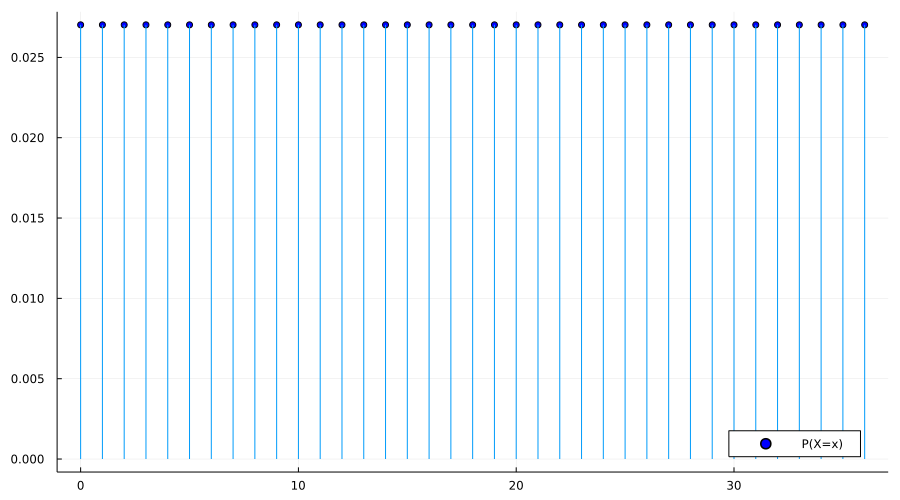

In [7]:
#Graficamos la ley y la distribucion
x=(0:36)
px = pdf.(distX,x) #pdf calcula la ley de distX en x.

plot(x,px,line=:stem,marker=:circle,markercolor=:blue,label="P(X=x)")

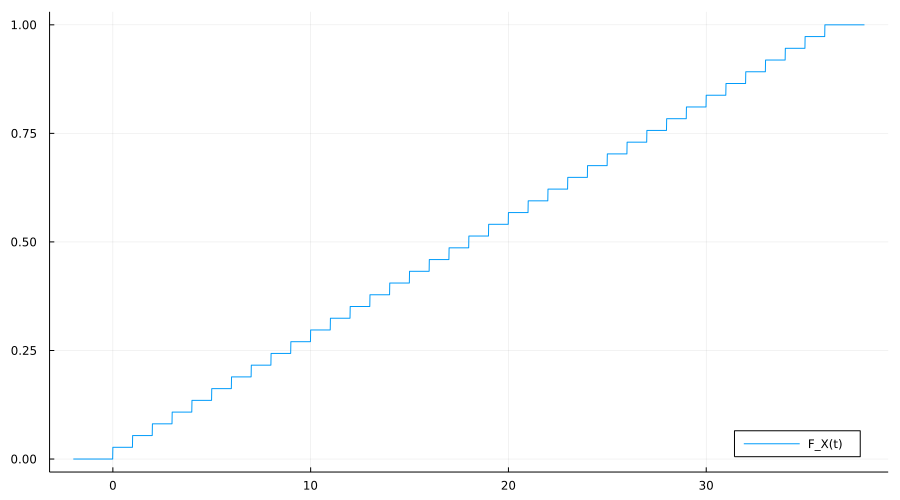

In [9]:
#Graficamos la distribucion acumulada
t=(-2:0.01:38)
Fx = cdf.(distX,t)

plot(t,Fx,label="F_X(t)")

In [13]:
#Podemos también sortear un valor
X = rand(distX)

7

In [17]:
#O una lista de valores
X = rand(distX,10)

10-element Vector{Int64}:
 34
 17
  7
 22
 20
  9
  6
 35
 36
  5

### Continuando el ejemplo

Supongamos que ahora para el mismo experimento definimos una nueva variable aleatoria:

$$Y = \text{"dinero ganado si apuesto a rojo \$1"}.$$

La ruleta tiene $18$ números rojos, $18$ negros y $1$ verde (el $0$). Si el número que sale es rojo se me devuelve el peso y me dan otro, si no pierdo el peso. La nueva variable tiene entonces la ley:

$$Y = \left\{\begin{array}{ll} +1 & p=18/37 \text{  (acierto)}, \\ -1 & p=19/37 \text{  (no acierto)}\end{array}\right.$$

In [18]:
## Creo la distribucion. Usamos DiscreteNonParametric que es generico
## Se le pasa soporte y probabilidades

distY = DiscreteNonParametric([-1.0,1.0],[19/37,18/37])

DiscreteNonParametric{Float64, Float64, Vector{Float64}, Vector{Float64}}(support=[-1.0, 1.0], p=[0.5135135135135135, 0.4864864864864865])

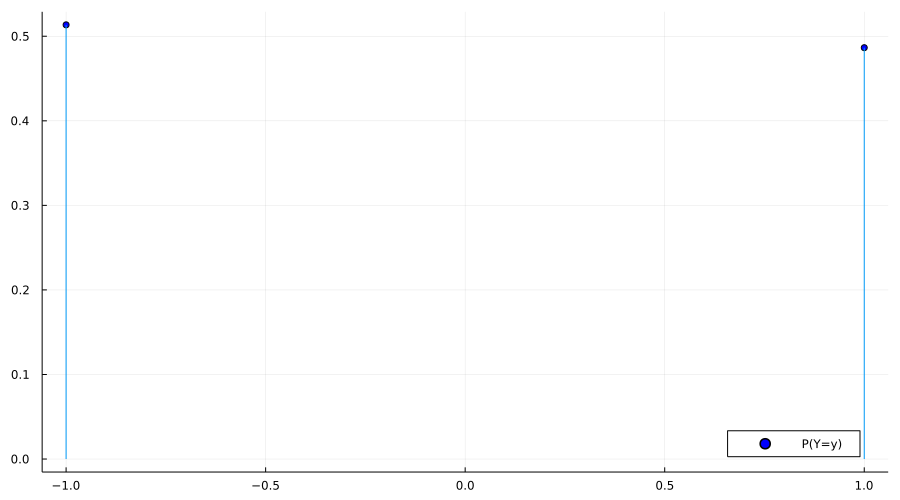

In [19]:
#Graficamos la ley y la distribucion
y=[-1,1]
py = pdf.(distY,y)

plot(y,py,line=:stem,marker=:circle,markercolor=:blue,label="P(Y=y)")

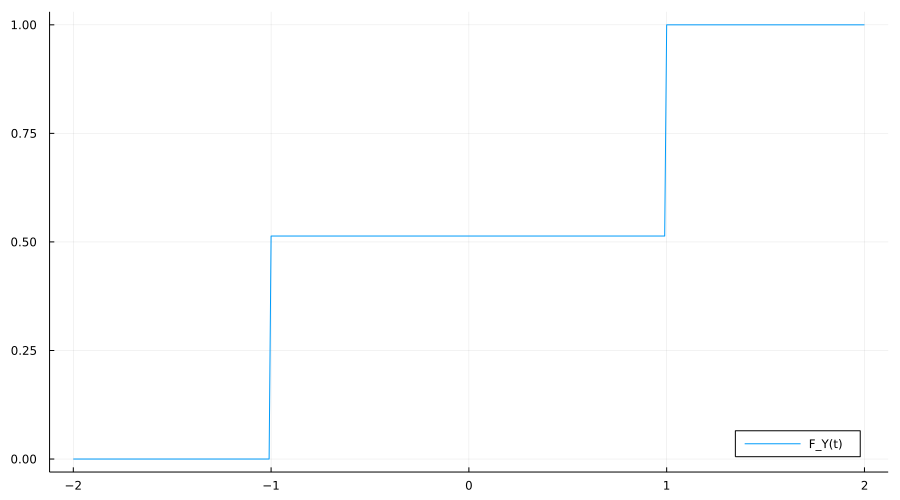

In [20]:
#Graficamos la distribucion acumulada
t=(-2:0.01:2)
Fy = cdf.(distY,t)

plot(t,Fy,label="F_Y(t)")

### Sorteando la nueva variable

Para sortear resultados de $Y$ hay dos caminos. O sorteamos $X$ y luego nos fijamos si es "rojo" o bien sorteamos $Y$ directamente. Veamos que los dos métodos son equivalentes.

Para el primer camino necesitamos una función que indique si un número es "rojo".

In [22]:
function esRojo(x)
    
    rojos = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]
    if x in rojos
        return 1.0
    else
        return -1.0
    end
end

esRojo (generic function with 1 method)

Sorteamos entonces instancias de $X$ y luego aplicamos la función. Notar que el `.` permite propagar la función a todo un vector (igual que en Scilab, pero para funciones arbitrarias).

In [56]:
#Sorteo n=1000 tiradas de la ruleta
n=1000;
X=rand(distX,n)

Y=esRojo.(X)

1000-element Vector{Float64}:
  1.0
 -1.0
  1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
 -1.0
 -1.0
 -1.0
  1.0
 -1.0
  ⋮
 -1.0
  1.0
 -1.0
  1.0
  1.0
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
  1.0
 -1.0

Podemos ahora analizar el resultado. Por ejemplo, la ganancia neta y la proporción de veces que salió cada resultado:

In [57]:
println("Ganancia neta: $(sum(Y))")
println("Veces que ganamos: $(sum(Y.==1)), proporción: $(sum(Y.==1)/n)")
println("Veces que perdimos: $(sum(Y.==-1)),  proporción: $(sum(Y.==-1)/n)")
println("Veces que salió el 0: $(sum(X.==0))")

Ganancia neta: -26.0
Veces que ganamos: 487, proporción: 0.487
Veces que perdimos: 513,  proporción: 0.513
Veces que salió el 0: 32


Y podemos estimar la distribución empírica del resultado, ya sea la ley o la CDF usando herramientas del paquete `StatsBase`.

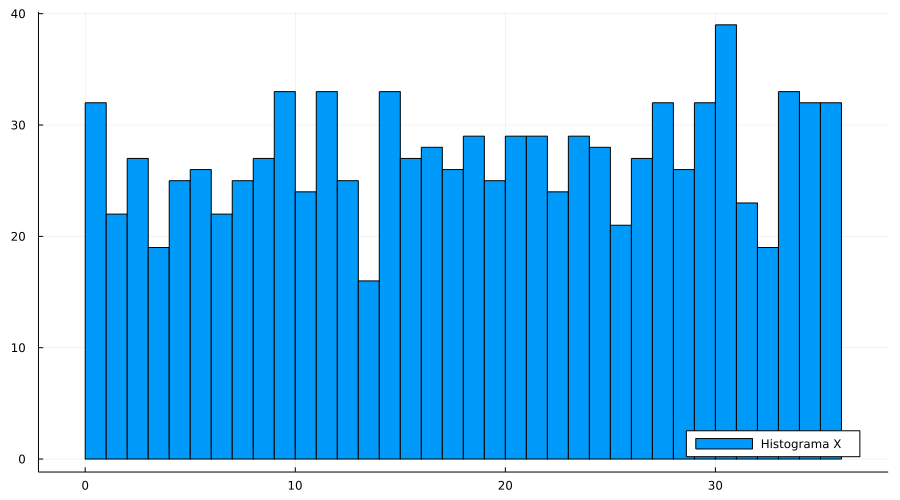

In [58]:
using StatsBase

#Ajusto un histograma
histX = fit(Histogram,X,(0:36))
plot(histX,label="Histograma X")

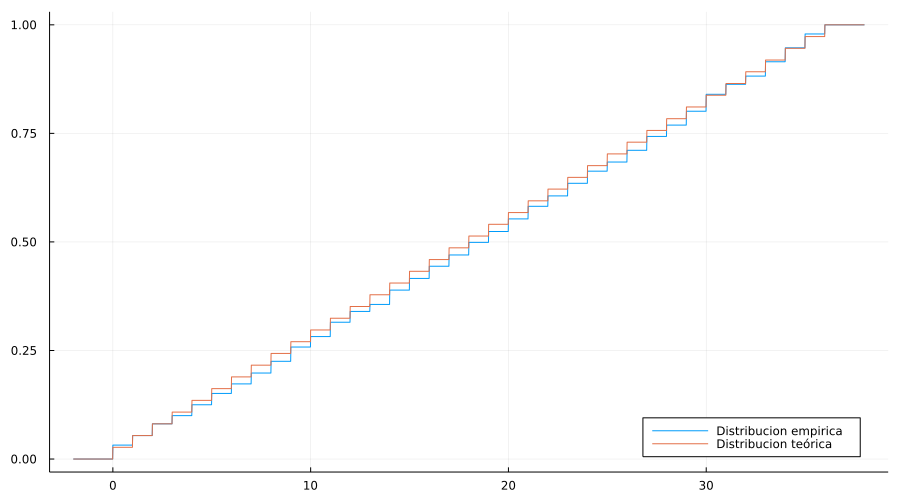

In [59]:
#Calculo la distribucion empírica
ecdfX = ecdf(X)

t=(-2:0.01:38)
plot(t,ecdfX.(t),label="Distribucion empirica")

#Con esta linea agregamos una grafica a la ya existente
plot!(t,cdf.(distX,t),label="Distribucion teórica")


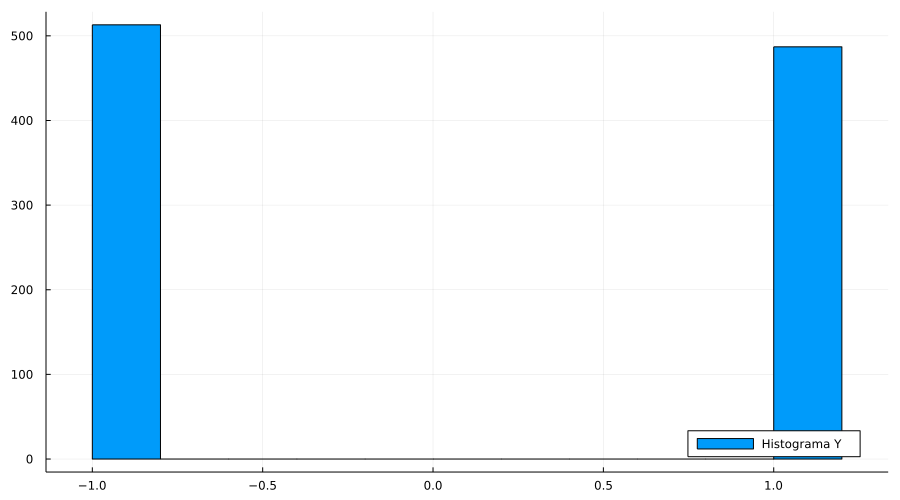

In [60]:
#Ajusto un histograma
histY = fit(Histogram,Y)
plot(histY,label="Histograma Y")

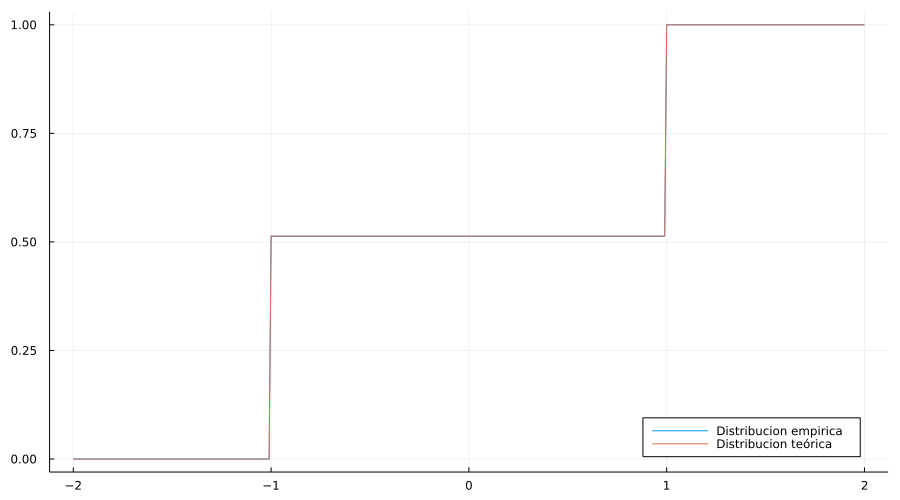

In [61]:
#Calculo la distribucion empírica
ecdfY = ecdf(Y)

t=(-2:0.01:2)
plot(t,ecdfY.(t),label="Distribucion empirica")
plot!(t,cdf.(distY,t),label="Distribucion teórica")


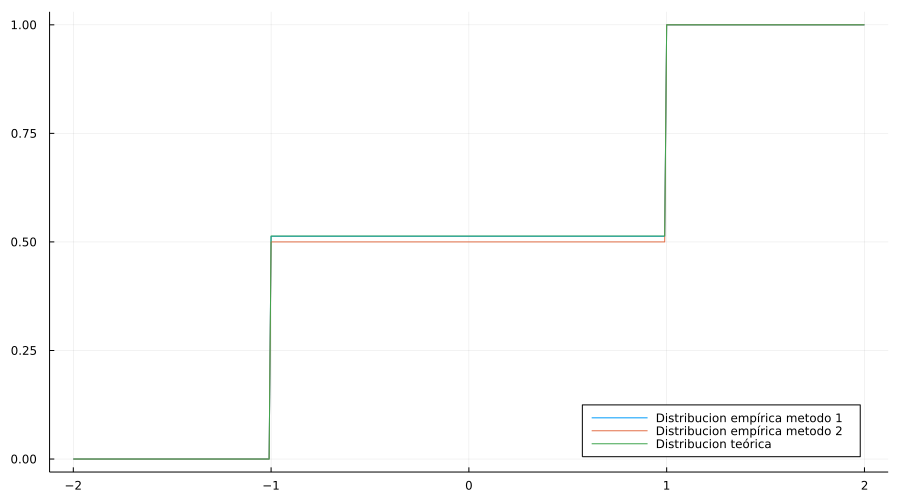

In [62]:
#Tambien podemos sortear directamente con la distribucion de Y
Y2 = rand(distY,n)

ecdfY2 = ecdf(Y2)

plot(t,ecdfY.(t),label="Distribucion empírica metodo 1")
plot!(t,ecdfY2.(t),label="Distribucion empírica metodo 2")
plot!(t,cdf.(distY,t),label="Distribucion teórica")

## Esperanza de una variable aleatoria discreta

La *esperanza matemática* o *valor medio* de una variable aleatoria discreta se define como:

$$E[X] = \sum_{x_i} x_i P(X=x_i).$$

> **Ejemplos:** Si X e Y son las v.a. definidas anteriormente, entonces
>
> $$E[X] = \sum_{i=0}^{36} i \frac{1}{37} = \frac{1}{37} \frac{(36)(37)}{2} = 18.$$
>
> $$E[Y] = (+1)\frac{18}{37} + (-1)\frac{19}{37} = -\frac{1}{37}.$$

## Ley de grandes números

La esperanza juega un rol central en la *ley de grandes números*:

> **Ley de grandes números (Kolmogorov):** Si $X_1,X_2,\ldots,X_n,\ldots$ es una sucesión de variables aleatorias independientes con esperanza $E|X|<\infty$ entonces:
>
> $$\bar{X}_n = \frac{X_1+\ldots+X_n}{n} \rightarrow_n E[X].$$

Verifiquemos lo anterior en la práctica. Recordemos que `X` contiene sorteos independientes de la ruleta e `Y` de las ganancias por jugar a rojo.

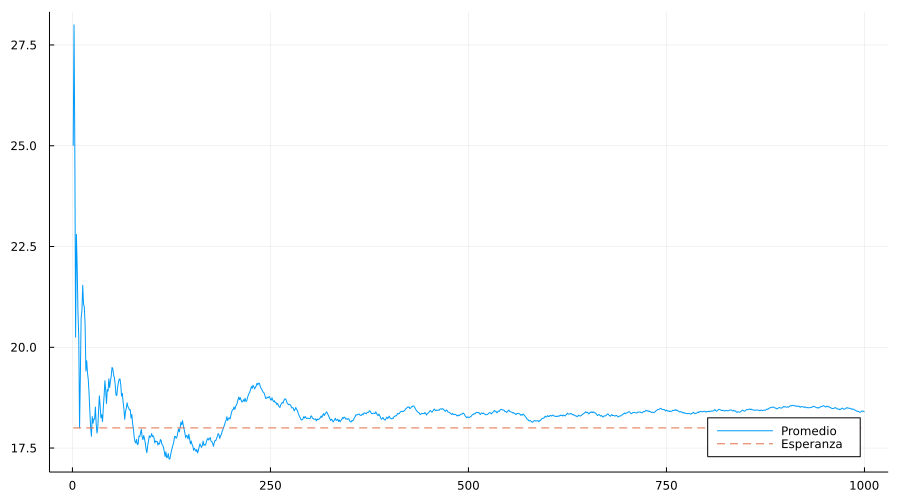

In [63]:
#Calculemos la evolución del promedio
#cumsum calcula la suma acumulada, y la divido elemento a elemento por la cantidad de términos.
Xn = cumsum(X)./(1:n)

plot((1:n),Xn,label="Promedio")
plot!((1:n),18*ones(size(Xn)),line=:dash, label="Esperanza")

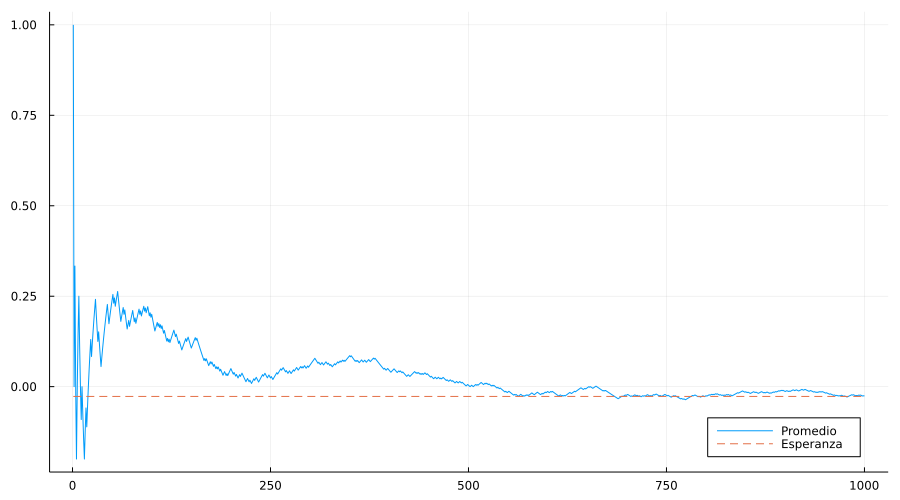

In [64]:
Yn = cumsum(Y)./(1:n)

plot((1:n),Yn,label="Promedio")
plot!((1:n),-1/37*ones(size(Yn)),line=:dash,label="Esperanza")

### El casino siempre gana....

Una forma de interpretar lo anterior es observar que, para $n$ grande:

$$S_n = \sum_{i=1}^n Y_i \approx nE[Y].$$

Por lo que la ganancia acumulada, si $E[Y]<0$ tiene a $-\infty$ linealmente con $n$:

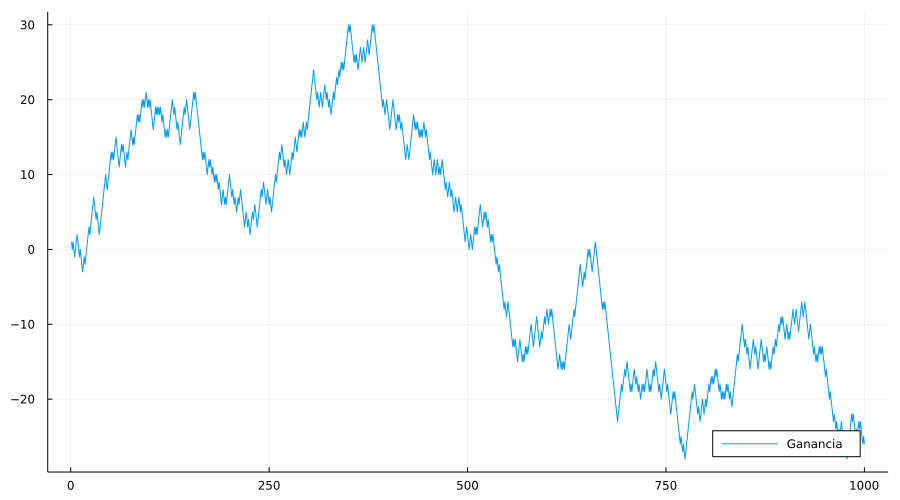

In [65]:
plot((1:n),cumsum(Y),label="Ganancia")

Podemos hacerlo más veces, y aumentar la cantidad de sorteos...

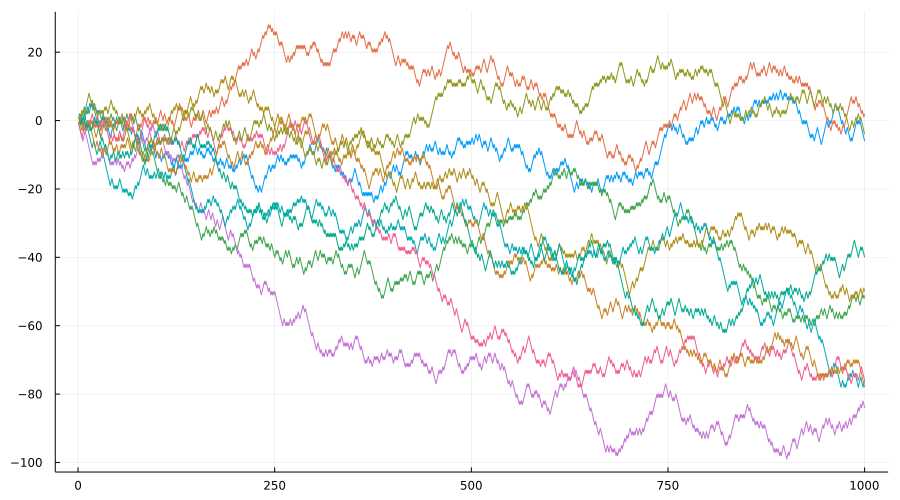

In [70]:
n=1000  #Aumentar para ver el efecto
rep = 10 #Aumentar para ver el efecto

#defino un plot para ir agregando trazas
p=plot(legend=:none)

for i=1:rep
    Y=rand(distY,n)
    plot!(p,(1:n),cumsum(Y))
end

p

### Varianza de una variable aleatoria.

La variabilidad del resultado en las repeticiones depende de la noción de *varianza*:

>**Definición:** la *varianza* de una variable aleatoria se define como
>
> $$\textrm{Var}(X) = E[(X-E[X])^2].$$
>
>y es una medida de dispersión alrededor de la media.

Observación: aplicando propiedades, puede verse que $\textrm{Var}(X) = E[X^2] - E[X]^2$.

## Algunas distribuciones discretas importantes.


* **Bernoulli:** $X\sim \textrm{Ber}(p)$ con $0<p<1$ si $P(X=1)=p$, $P(X=0)=1-p$.

Es la que modela una el "éxito" en un experimento.

* **Binomial:** $X\sim \textrm{Bin}(n,p)$ con $n$ entero y $0<p<1$ si:
$$P(X=k) = C^n_k p^k (1-p)^{n-k}, \quad 0\leqslant k \leqslant n.$$

Es la que modela cantidad de éxitos en $n$ intentos independientes de lo anterior. Para $n=1$ es la Bernoulli.

* **Geometrica:** $X\sim \textrm{Geo}(p)$, $0<p<1$ si:
$$P(X=k) = p(1-p)^{k-1} \quad k=1,2,\ldots $$

Modela la cantidad de veces que hay que intentar (con prob. $p$) antes de tener "éxito".

* **Poisson:** $X\sim \textrm{Poisson}(\lambda)$, $\lambda>0$ si:
$$P(X=k) = e^{-\lambda} \frac{\lambda^k}{k!} \quad k=0,1,2,\ldots $$

Modela la cantidad de "ocurrencias" de un evento que ocurre en promedio $\lambda$ veces. Más adelante profundizaremos en esto.


## Ejercicio

1. Construir una función que sortee una moneda que tiene probabilidad $p$ de salir cara y repita el experimento  las veces que haga falta hasta obtener cara.

2. La variable anterior debería tener distribución geométrica. Repite $n$ sorteos del procedimiento anterior y realice un histograma y la distribución empírica, comparando con la distribución teórica.

3. Suponga ahora que tenemos un horizonte largo de tiempo $N$, Construya una función que:
 * Repita los sorteos anteriores hasta acumular $N$ o más intentos.
 * Devuelva la cantidad de veces que hubo éxito en todo el intervalo.
 
 Notar que lo anterior debería tener distribución $Bin(N,p)$. Realizar el experimento varias veces y comparar con el caso teórico.
 
4. Supongamos que la persona que tira la moneda lo hace cada vez más rápido (por ejemplo, le lleva tiempo $1/k$ y no $1$), pero la moneda tiene cada vez menos probabilidad de salir cara. Más formalmente, supongamos que:
$$k\to\infty \quad \text{y} \quad kp \to\lambda$$

Simular la variable $Y= X/k$ con $X\sim Geo(kp)$ y mostrar que para $k$ grande y $kp\to\lambda$, la distribución converge a una exponencial.